# Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [571]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

Reviews = []
Comments = []

for p in range(1, pages + 1):

    print(f"Scraping page {p}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{p}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content of each page
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    ## Scrape written reviews:
    writtenReviews = parsed_content.find_all("div", {"class":"text_content"})
    for i in range(len(writtenReviews)):
        ## Clean the format of each written review:
        entry = writtenReviews[i].get_text().split("|")
        if len(entry)==2:
            writtenReviews[i] = entry[1].lstrip()
    Comments += writtenReviews
        
    ## Scrape the statistics of each review:
    parsed_stats = parsed_content.find_all("div",{ "class":"review-stats"})
    parsed_stats
    
    headers_values = []
    stars_values = []
    chars_values = []
    for i in range(len(parsed_stats)):

        ## 1) headers for each review:
        headers_names = parsed_stats[i].find_all("td", {"class":"review-rating-header"})
        headers_i = []
        for j in range(len(headers_names)):
            headers_i.append(headers_names[j].get_text())
        headers_values.append(headers_i)

        ## 2) stars-ratings:
        stars_i = parsed_stats[i].find_all("td", {"class":"review-rating-stars"})
        for j in range(len(stars_i)):
            stars_i[j] = int(stars_i[j].find_all("span", {"class":"star fill"})[-1].get_text())
        stars_values.append(stars_i)

        ## 3) values of other characteristics of the flight:
        chars_i = parsed_stats[i].find_all("td", {"class":"review-value"})
        for j in range(len(chars_i)):
            chars_i[j] = chars_i[j].get_text()
        chars_values.append(chars_i)
    
    ## Organize the information of each review in a dictionary, using the header names as keys:
    reviews_all = []
    for i in range(len(parsed_stats)):
        review_i = {}
        reviews_i_values = chars_values[i][:-1] + stars_values[i] + [chars_values[i][-1]]
        for j in range(len(reviews_i_values)):
            review_i[ headers_values[i][j] ] = reviews_i_values[j]
        reviews_all.append(review_i)

    print(f"   ---> {len(reviews_all)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 100 total reviews
Scraping page 3
   ---> 100 total reviews
Scraping page 4
   ---> 100 total reviews
Scraping page 5
   ---> 100 total reviews
Scraping page 6
   ---> 100 total reviews
Scraping page 7
   ---> 100 total reviews
Scraping page 8
   ---> 100 total reviews
Scraping page 9
   ---> 100 total reviews
Scraping page 10
   ---> 100 total reviews


In [649]:
## Convert the collected info into a dataframe:
df = pd.DataFrame(Reviews)
df['Comment'] = Comments
df[:3]

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Comment
0,A350,Solo Leisure,Premium Economy,London to Vancouver,September 2024,4.0,5.0,2.0,1.0,3.0,2,yes,NaN,British Airways World Traveller Plus (Premium ...
1,A320,Business,Economy Class,Gatwick to Amsterdam,September 2024,3.0,4.0,1.0,1.0,3.0,1,no,1.0,BA is barely a step above low cost airlines. T...
2,NaN,Solo Leisure,Economy Class,Paris to San Diego via London,September 2024,5.0,5.0,5.0,NaN,5.0,5,yes,NaN,Happy with the flight crew. Hadn't been on a p...


In [5]:
df.to_csv("data/BA_reviews.csv")

# Data overview:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                529 non-null    object 
 1   Type Of Traveller       998 non-null    object 
 2   Seat Type               1000 non-null   object 
 3   Route                   996 non-null    object 
 4   Date Flown              1000 non-null   object 
 5   Seat Comfort            912 non-null    float64
 6   Cabin Staff Service     902 non-null    float64
 7   Food & Beverages        775 non-null    float64
 8   Inflight Entertainment  517 non-null    float64
 9   Ground Service          942 non-null    float64
 10  Value For Money         1000 non-null   int64  
 11  Recommended             1000 non-null   object 
 12  Wifi & Connectivity     322 non-null    float64
 13  Comment                 1000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory

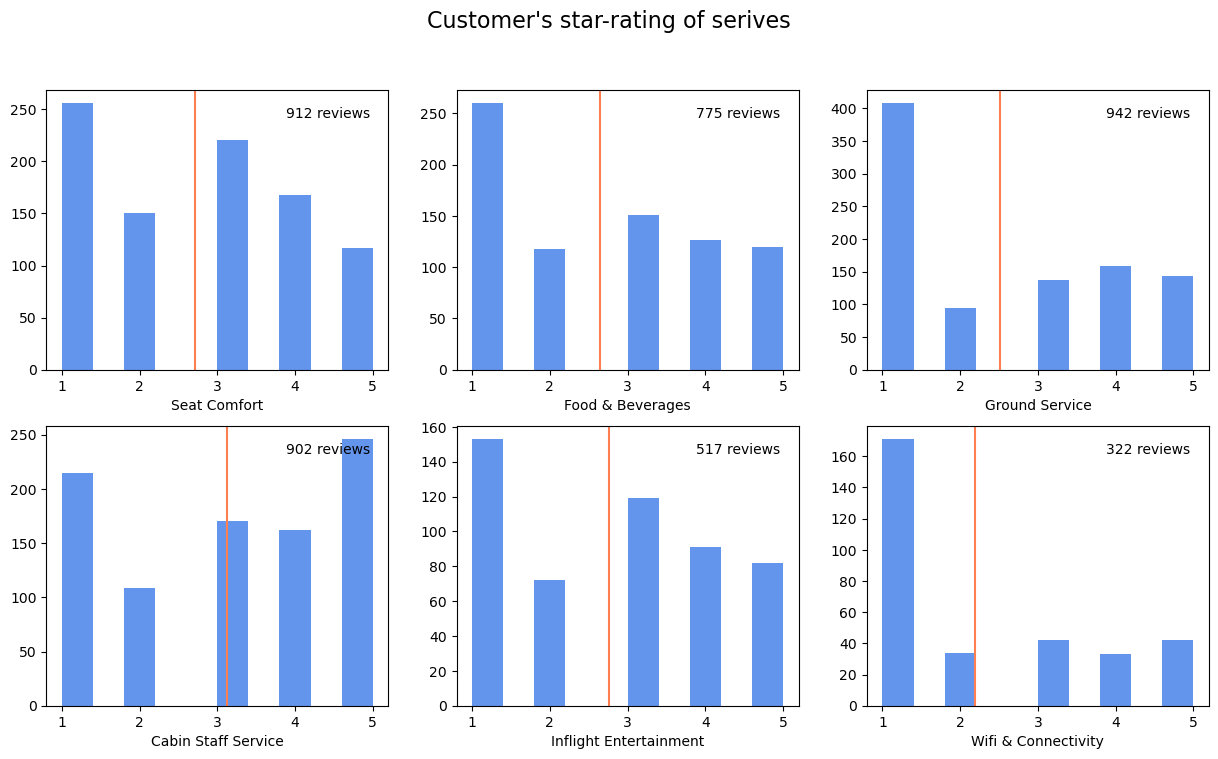

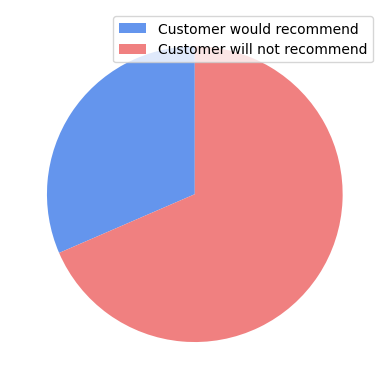

In [639]:
num_features = ['Seat Comfort','Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity' ]

fig, axs = plt.subplots(2,3)
fig.set_size_inches(15,8)
fig.suptitle("Customer's star-rating of serives", fontsize=16)
i=0
for colm in range(3):
    for row in range(2):
        axs[row][colm].hist( df[num_features[i]].dropna(), align='mid', color='cornflowerblue')
        axs[row][colm].axvline(x=df[num_features[i]].mean(), color='coral', linestyle='-')
        axs[row][colm].set_xlabel(num_features[i])
        tx = str(int(len(df[num_features[i]].dropna())))+' reviews'
        axs[row][colm].text(0.7,0.9, tx, transform=axs[row][colm].transAxes )
        i += 1
plt.show()


## Customer's recommendation:
no = pd.get_dummies(df['Recommended'], dtype=int)['no'].sum()
yes = pd.get_dummies(df['Recommended'], dtype=int)['yes'].sum()

fig, axs = plt.subplots(1)
labels = ['Customer would recommend','Customer will not recommend']
colors = ['cornflowerblue', 'lightcoral']
patches, texts = axs.pie([yes,no], colors=colors, startangle=90)
axs.legend(patches, labels, loc="upper right")

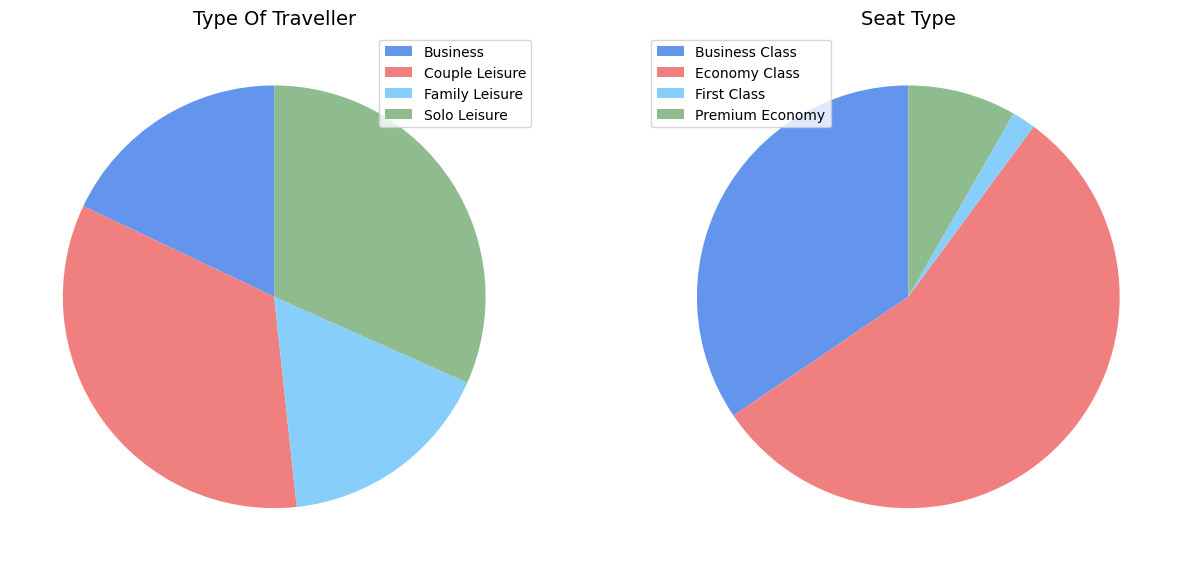

In [513]:
char_features = [ 'Type Of Traveller','Seat Type']

fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,8)

for colm in range(2):
    df_dummies = pd.get_dummies(df[char_features[colm]]).astype(int)

    labels = df_dummies.columns
    colors = ['cornflowerblue', 'lightcoral', 'lightskyblue', 'darkseagreen']
    patches, texts = axs[colm].pie(df_dummies.sum(), colors=colors, startangle=90)
    axs[colm].legend(patches, labels, loc="best")
    axs[colm].set_title(char_features[colm], fontsize=14)

plt.show()

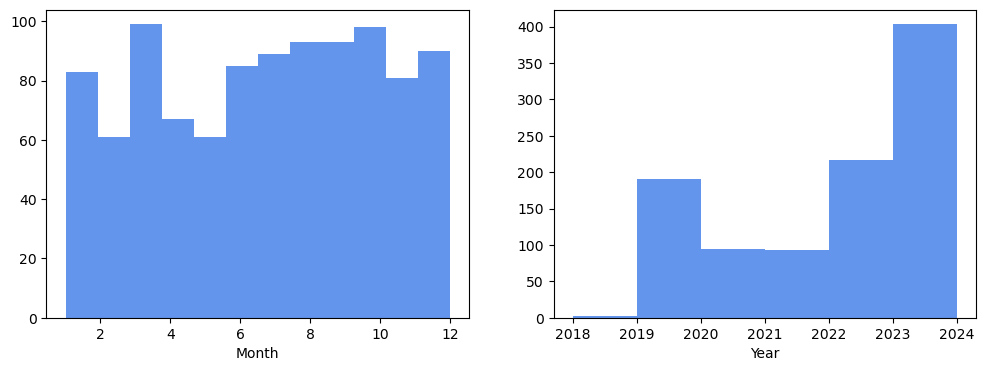

In [595]:
## Define dictionary to convert names of months into numbers:
MonthsHeaders = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthsDic = {}
for i in range(12):
    monthsDic[MonthsHeaders[i]] = i+1

## Collecting all the months and years separately:
months_tracker = []
years_tracker = []
for i in range(len(df['Date Flown'].dropna())):
    month, year = df['Date Flown'][i].split(' ')
    months_tracker.append(monthsDic[month])
    years_tracker.append(int(year))

## Plot histogram:
xlabels = ['Month', 'Year']
xdata = [months_tracker, years_tracker]
binN = [12, max(years_tracker)-min(years_tracker)]
ticksLabels = [MonthsHeaders, np.arange(min(years_tracker), max(years_tracker), 1)]

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,4)
for colm in range(2):
    axs[colm].hist( xdata[colm], align='mid', color='cornflowerblue', bins=binN[colm])
    axs[colm].set_xlabel(xlabels[colm])
    #axs[colm].Axis.set_label_text(ticksLabels[colm])
    
plt.show()

# Sentiment Analysis:

In [643]:
#!pip install textblob
import textblob

## Obtaining the polarity and subjectivity scores:
## The polarity score is a float within the range [-1.0, 1.0]. 
## The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
pol_list, pol_norm_list  = [], []
sub_list = []
for i in range(len(df)):
    review = textblob.TextBlob(df['Comment'][i])
    pol_list.append(review.sentiment.polarity)
    pol_norm_list.append( (review.sentiment.polarity +1)/2 )
    sub_list.append(review.sentiment.subjectivity)

df['polarity'] = pol_list
df['normalized_polarity'] = pol_norm_list
df['subjectivity'] = sub_list

In [645]:
df[:3]

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Comment,polarity,normalized_polarity,subjectivity
0,A350,Solo Leisure,Premium Economy,London to Vancouver,September 2024,4.0,5.0,2.0,1.0,3.0,2,yes,NaN,British Airways World Traveller Plus (Premium ...,0.175119,0.587560,0.529048
1,A320,Business,Economy Class,Gatwick to Amsterdam,September 2024,3.0,4.0,1.0,1.0,3.0,1,no,1.0,BA is barely a step above low cost airlines. T...,0.008333,0.504167,0.300000
2,NaN,Solo Leisure,Economy Class,Paris to San Diego via London,September 2024,5.0,5.0,5.0,NaN,5.0,5,yes,NaN,Happy with the flight crew. Hadn't been on a p...,0.300000,0.650000,0.450000


<Figure size 640x480 with 0 Axes>

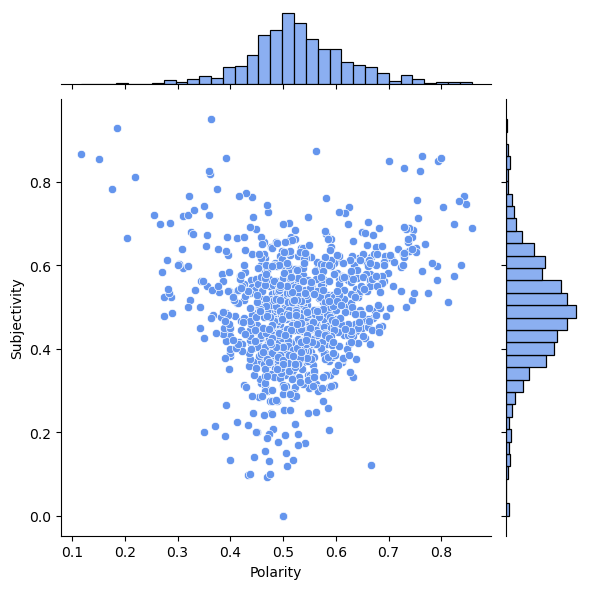

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.jointplot(data=df, x='normalized_polarity', y='subjectivity', color='cornflowerblue')
#sns.histplot(data=df, x='normalized_polarity', y='subjectivity', bins=3, cbar=True)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
## Other features include identifying-sentences and counting phrases:

#for i in range(1):#len(df)):
#    review = textblob.TextBlob(df['reviews'][i])
#    sentences = review.sentences
#    print(sentences)
#    print(review.noun_phrases.count('insert_phrase'))

## Applying SQL queries:

In [71]:
import csv, sqlite3

## Credentials of the DB2 database:
dsn_hostname = "98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "mzf99447"        # e.g. "abc12345"
dsn_pwd = "7OvJosruh343brjZ"      # e.g. "7dBZ3wWt9XN6$o0J"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "30875"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL

## Connect to the DB2 database:
%load_ext sql
%sql ibm_db_sa://mzf99447:7OvJosruh343brjZ@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/BLUDB?security=SSL


In [73]:
## Connect to SQLite:
con = sqlite3.connect("REVIEWS.db")
cursor_obj = con.cursor()

In [75]:
## Create the table:
drop_query = """ drop table REVIEWS;"""
cursor_obj.execute(drop_query)

createQuery = """ create table IF NOT EXISTS REVIEWS(ID INTEGER PRIMARY KEY NOT NULL, POLARITY VARCHAR(20), SUBJECTIVITY VARCHAR(20) );"""
cursor_obj.execute(createQuery)

In [ ]:
## Fill the table:
for i in range(len(df)):
    #review = df['reviews'][i]
    polarity = df['normalized_polarity'][i]
    subjectivity = df['subjectivity'][i]
    fillQuery = 'INSERT INTO REVIEWS VALUES (' + str(i) + ',' + str(polarity) + ',' + str(subjectivity) + ')'
    #print(fillQuery)
    cursor_obj.execute(fillQuery)

In [ ]:
con.commit()

%sql sqlite:///REVIEWS.db
%sql SELECT * FROM REVIEWS LIMIT 5;

In [77]:
cursor_obj.close()

In [ ]:
## If database is locked:
#!fuser REVIEWS.db
#!kill -9 above_output_number

In [ ]:
viewQuery = "SELECT * FROM REVIEWS WHERE POLARITY > 0.66;"
df_high_polarity = pd.read_sql_query(viewQuery, con)

viewQuery = "SELECT * FROM REVIEWS WHERE POLARITY < 0.66 AND POLARITY > 0.33;"
df_medium_polarity = pd.read_sql_query(viewQuery, con)

viewQuery = "SELECT * FROM REVIEWS WHERE POLARITY < 0.33;"
df_low_polarity = pd.read_sql_query(viewQuery, con)


In [ ]:
%sql SELECT * FROM REVIEWS WHERE POLARITY < 0.3  ORDER BY POLARITY LIMIT 10;

In [ ]:
worse_reviews = [984,220,992,3,78,593,286,130,305,96]
text = ''
for i in range(len(worse_reviews)):
    text += df['reviews'][worse_reviews[i]]+'\n'
print(text)

In [ ]:
tb = textblob.TextBlob(text)
sentences = tb.sentences
for i in range(len(sentences)):
    

### WordClouds:   